# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were tested with the same number of time points in the data, while the other drug regimens were treated over less time points.
- The Box Plot shows us that Ceftamin and Infubinal have a wider spread of final turmor volumes than Capomulin and Ramincane.  Ceftamin and Infubinal also have much higher median values for final tumor volumes than Capomulin and Ramicane.
- Capomulin and Ramicane have similar median values for final tumor volumes.  However, Capomulin has produced more consistent results for final tumor volumes.  
- As the median for Capomulin sits within the top 50 % of results for final tumor volume this suggests that the median value is greater than the average final tumor volume.
- A strong Correlation of 0.84 informs us that there is a strong positive correlation between mouse weight and tumor volume.
- The Box Plot data for Capomulin and the strong linear correlation between weight and tumor volume could be used to refine treatment regimens for further research.

#### Conclusion: 
Pymaceuticals’ drug of interest, Capomulin achieves a better outcome for the treatment of SCC tumors over 45 days of treatment.
 

In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
merged_df = study_results.merge(mouse_metadata, how='inner', on='Mouse ID')

#Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
#Checking the number of unique mice
mice_ids = merged_df['Mouse ID'].nunique()

#Display statement for number of unique mice ids
print(f'There are {mice_ids} unique mice IDs.')

There are 249 unique mice IDs.


In [4]:
#Our data should be uniquely identified by Mouse ID and Timepoint
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(
    subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

#Display all duplicated mouse ids
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
#Get all the data for the duplicate mouse ID. 
duplicate_id = merged_df.loc[merged_df['Mouse ID'] == 'g989']

#Display the data
duplicate_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [7]:
#Checking the number of mice in the clean DataFrame
#Display statement for unique mouse ids
print(f'Updated Number of Unique Mice IDs after cleaning: ',len(clean_data.groupby('Mouse ID').count()))

#Disply DataFrame
clean_data.head()

Updated Number of Unique Mice IDs after cleaning:  248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [22]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group by drug regimen
grouped_dr_df = clean_data.groupby('Drug Regimen')

#Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
mean = grouped_dr_df['Tumor Volume (mm3)'].mean()
median = grouped_dr_df['Tumor Volume (mm3)'].median()
variance = grouped_dr_df['Tumor Volume (mm3)'].var()
std_dev = grouped_dr_df['Tumor Volume (mm3)'].std()
sem = grouped_dr_df['Tumor Volume (mm3)'].sem()

#Assemble the resulting series into a single summary DataFrame
stat_summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

#Display dataframe
stat_summary_df .head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Charts

[]

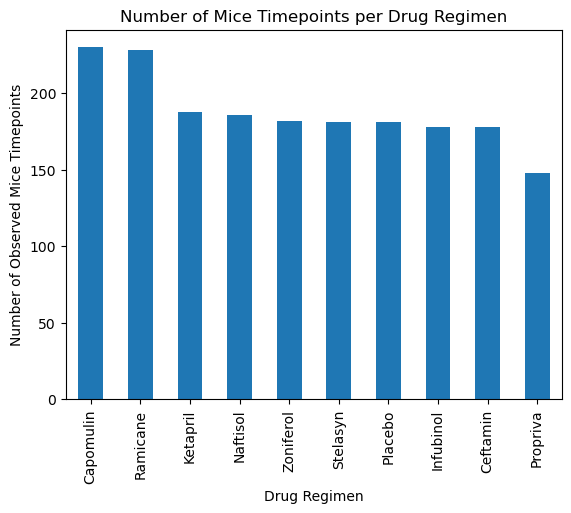

In [9]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_timepoints = clean_data['Drug Regimen'].value_counts()
pandas_bar_chart = mice_timepoints.plot.bar()

#Axis Display
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice Timepoints')
plt.title('Number of Mice Timepoints per Drug Regimen')

#Display plot
pandas_bar_chart.plot()

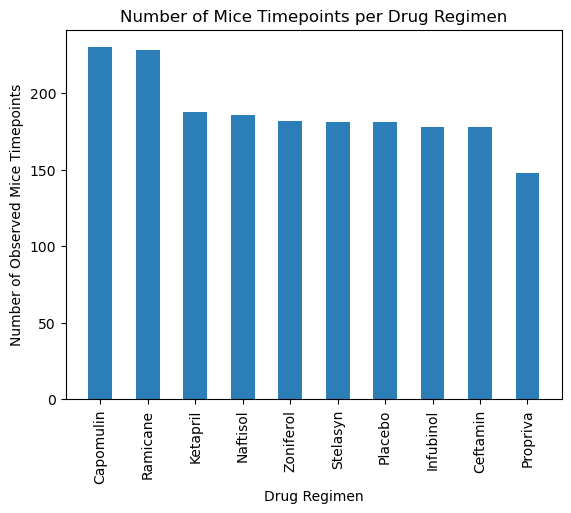

In [10]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_timepoints.index.values
y_axis = mice_timepoints.values

# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.95, align='center', width=0.5)

# Setting the xlabel and ylabel, title using class methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice Timepoints')
plt.xticks(rotation='vertical')
plt.title('Number of Mice Timepoints per Drug Regimen')

#Display plot
plt.show()

## Pie Charts

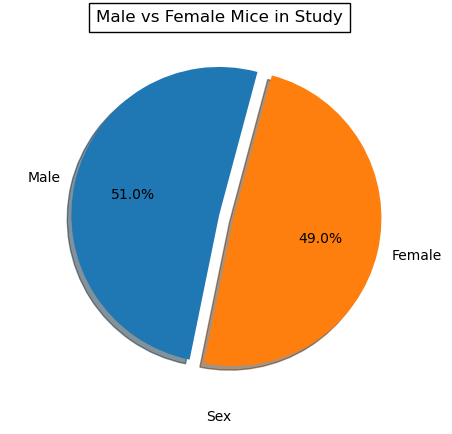

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data['Sex'].value_counts()

#Create the pie chart
sex_data.plot.pie(autopct= '%1.1f%%', startangle=75, shadow=True, explode=(0,0.1))
ax = sex_data.plot()
ax.set_ylabel(' ')
ax.set_xlabel('Sex')
ax.set_title('Male vs Female Mice in Study', bbox={'facecolor':'1.0', 'pad':5})

#Display plot
plt.show()

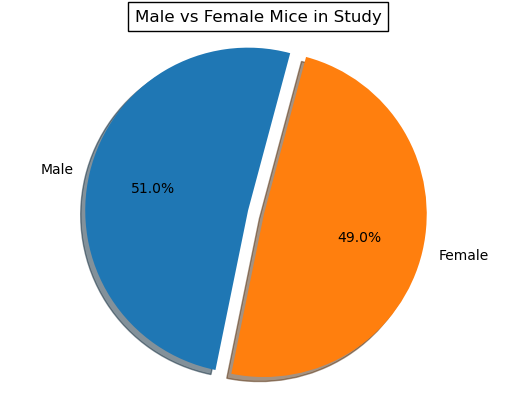

In [12]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
sizes = [958,922]
explode=(0,0.1)
fig1, ax1 = plt.subplots()

#Create the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=75)
plt.title('Male vs Female Mice in Study', bbox={'facecolor':'1.0', 'pad':5})
ax1.axis('equal')

#Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse
greatest_TP_df = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_TP_df = greatest_TP_df.merge(clean_data, on=['Mouse ID', 'Timepoint'], how='left')

#Display DataFrame
max_TP_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
#Put treatments into a list for for loop (and later for plot labels)
#Create empty list to fill with tumor vol data (for plotting)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Using a For Loop 
for regimen in regimens:
    
    for_df = max_TP_df.loc[max_TP_df ['Drug Regimen'] == regimen]

    #Create subset dataframes that narrow down to rows only containing the max timepoint for each regimen
    max_volume_df = for_df.loc[for_df['Timepoint'] == for_df['Timepoint']] 
                       
    #Create a series that consists of all final volume values for each regimen
    values = max_volume_df['Tumor Volume (mm3)']
    tumor_volume.append(values)
    
    #Calculate (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
   
    #Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    #Determine outliers using upper and lower bounds
    outliers = (values.loc[(max_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (max_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()

    #Display any outliers for each regimen
    print(f'{regimen} potential outliers:{outliers}')

Capomulin potential outliers:0
Ramicane potential outliers:0
Infubinol potential outliers:1
Ceftamin potential outliers:0


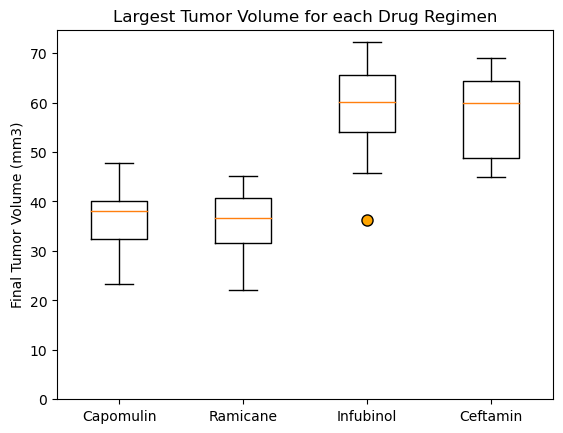

In [15]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_point = dict(markerfacecolor = 'orange', markersize=8)

#Create the boxplot
plt.boxplot(tumor_volume, flierprops= orange_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Largest Tumor Volume for each Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylim(ymin=0)

#Display plot
plt.show()

## Line and Scatter Plots

In [16]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter clean_data DataFrame for Capomulin drug regimen
df_filter = clean_data.copy()
df_filtered_cap = df_filter.loc[(df_filter['Drug Regimen'] == 'Capomulin'), :]

#Display the DataFrame
df_filtered_cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
#choose a random mouse from the Capomulin filtered dataframe 
#random_mouse = df_filtered_cap['Mouse ID'].sample(n=1)
#random_mouse

In [18]:
#Create a DataFrame with selected mouses data
df_g316_cap = df_filter.loc[(df_filter['Drug Regimen'] == 'Capomulin') & (df_filter['Mouse ID'] == 'g316')]
df_g316_cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1815,g316,0,45.000000,0,Capomulin,Female,22,22
1816,g316,5,44.022752,0,Capomulin,Female,22,22
1817,g316,10,44.502042,0,Capomulin,Female,22,22
1818,g316,15,45.216743,0,Capomulin,Female,22,22
1819,g316,20,45.933322,1,Capomulin,Female,22,22
1820,g316,25,46.809225,1,Capomulin,Female,22,22
1821,g316,30,44.221480,2,Capomulin,Female,22,22
1822,g316,35,44.702833,2,Capomulin,Female,22,22
1823,g316,40,45.565821,2,Capomulin,Female,22,22
1824,g316,45,40.159220,2,Capomulin,Female,22,22


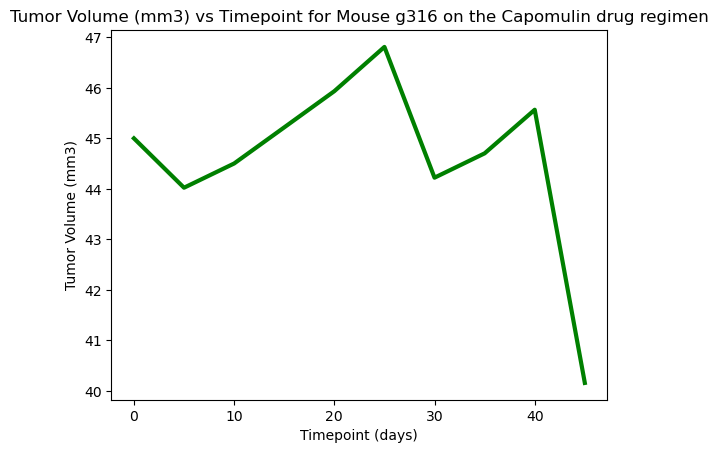

In [19]:
#Create the line plot for the selected mouse
df_g316_cap.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', color='green', linewidth=3)
plt.plot(figsize=(10,7))

#Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend().remove()
plt.title('Tumor Volume (mm3) vs Timepoint for Mouse g316 on the Capomulin drug regimen')

#Display plot
plt.show()

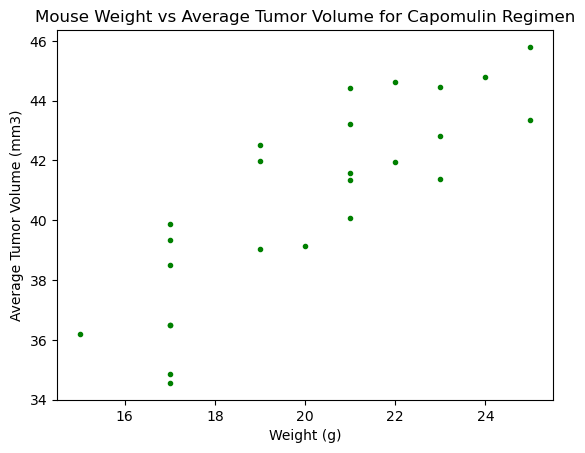

In [20]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Generate the data required
avg_tumor_vol_and_weight = df_filtered_cap.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

#Plot the scatter plot of mouse weight versus average tumor volume
plt.scatter(avg_tumor_vol_and_weight['Weight (g)'], avg_tumor_vol_and_weight['Tumor Volume (mm3)'],color='green', marker= '.')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')

#Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


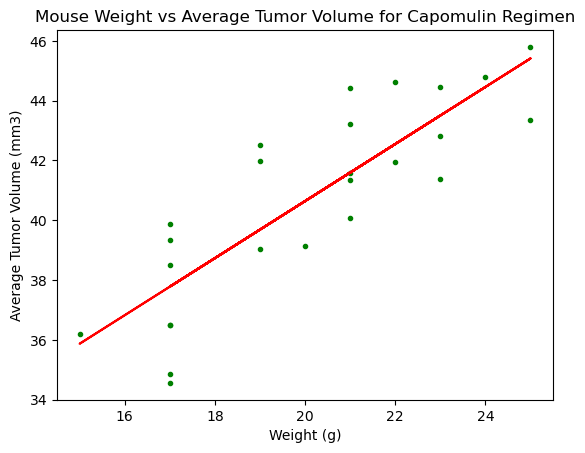

In [21]:
#Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Scatter plot as above
avg_tumor_vol_and_weight = df_filtered_cap.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

#Calculate the correlation coefficient
correlation = avg_tumor_vol_and_weight['Weight (g)'].corr(avg_tumor_vol_and_weight['Tumor Volume (mm3)'])
correlation = round(correlation, 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

#Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol_and_weight[
    'Weight (g)'], avg_tumor_vol_and_weight['Tumor Volume (mm3)'])

#Create a scatter plot of mouse weight versus average tumor volume
plt.scatter(avg_tumor_vol_and_weight['Weight (g)'], avg_tumor_vol_and_weight['Tumor Volume (mm3)'],color='green', marker= '.')

#Add the linear regression line to the scatter plot
plt.plot(avg_tumor_vol_and_weight['Weight (g)'], intercept + slope * avg_tumor_vol_and_weight['Weight (g)'], 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')

#Display plot
plt.show()